In [ ]:
from google.colab import files
uploaded = files.upload()


Saving plants_datas.xlsx to plants_datas.xlsx


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Plant_img.zip to Plant_img.zip


In [ ]:
import zipfile
import os

with zipfile.ZipFile('Plant_img.zip', 'r') as zip_ref:
    zip_ref.extractall('Plant_img')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [ ]:
import pandas as pd

df = pd.read_excel('plants_datas.xlsx')
plant_info = {
    row['Plant Name']: {
        'Scientific Name': row['Scientific Name'],
        'Benefits': row['Benefits']
    } for _, row in df.iterrows()
}



In [ ]:
# STEP 4: Load MobileNetV2 model
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing import image

model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

<ipython-input-21-a4fe6fa34bd7>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


In [ ]:
# STEP 5: Extract features from all plant images
import glob

image_folder = 'Plant_img'
image_paths = glob.glob(f"{image_folder}/**/*.jpg", recursive=True) + \
              glob.glob(f"{image_folder}/**/*.jpeg", recursive=True) + \
              glob.glob(f"{image_folder}/**/*.png", recursive=True)

features = []
labels = []

for path in image_paths:
    try:
        img = image.load_img(path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = preprocess_input(np.expand_dims(x, axis=0))
        feature = model.predict(x)[0]
        features.append(feature)
        labels.append(os.path.splitext(os.path.basename(path))[0])  # file name = plant name
    except Exception as e:
        print(f"❌ Error processing {path}: {e}")

print(f"✅ Loaded {len(features)} plant images.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/

In [ ]:
# STEP 6: Train KNN classifier
from sklearn.neighbors import KNeighborsClassifier

features = np.array(features)
labels = np.array(labels)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(features, labels)
print("✅ Model trained.")

✅ Model trained.



📸 Upload one or more plant images for prediction (click 'Cancel' to stop):


Saving Thyme.jpg to Thyme.jpg
❌ Error with image Thyme.jpg: cannot identify image file <_io.BytesIO object at 0x7a71082709f0>

📸 Upload one or more plant images for prediction (click 'Cancel' to stop):


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


Saving Ginger.jpg to Ginger.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step



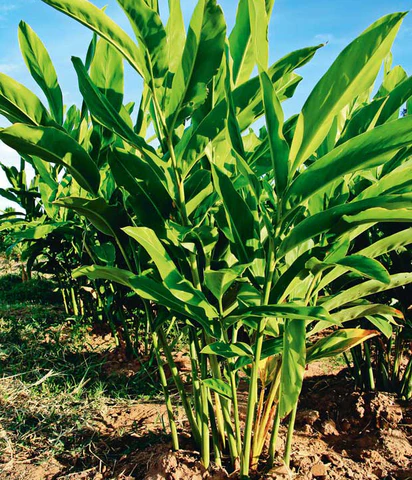


📸 Upload one or more plant images for prediction (click 'Cancel' to stop):


Saving Cat's claw.jpg to Cat's claw.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step



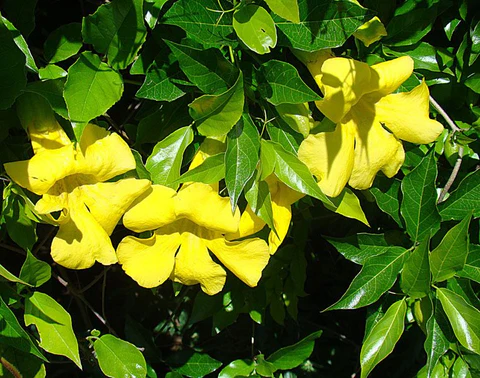


📸 Upload one or more plant images for prediction (click 'Cancel' to stop):


✅ No more images uploaded. Stopping prediction loop.


In [ ]:
from IPython.display import display, HTML
from PIL import Image as PILImage
from IPython.display import Image as IPImage
import base64

while True:
    print("\n📸 Upload one or more plant images for prediction (click 'Cancel' to stop):")
    uploaded_test = files.upload()

    if not uploaded_test:
        print("✅ No more images uploaded. Stopping prediction loop.")
        break

    for img_name in uploaded_test:
        try:
            # Step A: Predict
            img = image.load_img(img_name, target_size=(224, 224))
            x = image.img_to_array(img)
            x = preprocess_input(np.expand_dims(x, axis=0))
            feature = model.predict(x)[0]

            distances, indices = classifier.kneighbors([feature], n_neighbors=3)
            predicted_label = labels[indices[0][0]]

            # Step B: Prepare plant details
            if predicted_label in plant_info:
                plant = plant_info[predicted_label]
                plant_name = predicted_label
                scientific_name = plant["Scientific Name"]
                benefits = plant["Benefits"]
            else:
                plant_name = predicted_label
                scientific_name = "Not found"
                benefits = "No info available"

            # Step C: Convert image to base64 to embed in output
            with open(img_name, "rb") as f:
                img_bytes = f.read()
                img_base64 = base64.b64encode(img_bytes).decode()

            img_html = f'<img src="data:image/jpeg;base64,{img_base64}" width="300"/>'

            # Step D: Display prediction and image
            display(HTML(f"""
                <h3>🔍 Prediction Result:</h3>
                {img_html}
                <p><b>🌿 Plant Name:</b> {plant_name}</p>
                <p><b>🔬 Scientific Name:</b> {scientific_name}</p>
                <p><b>💡 Benefits:</b> {benefits}</p>
                <hr>
            """))
        except Exception as e:
            print(f"❌ Error with image {img_name}: {e}")
